Linear Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('linear_regression_dataset.csv')
df.dropna(inplace=True)
#Feature Sacling
df[['AGE','FEMALE','LOS','RACE','APRDRG']]=(df[['AGE','FEMALE','LOS','RACE','APRDRG']]-df[['AGE','FEMALE','LOS','RACE','APRDRG']].mean())/df[['AGE','FEMALE','LOS','RACE','APRDRG']].std()
#Splitting for testing and training
train_size = int(0.8 * len(df))
df_train,df_test=df[:train_size],df[train_size:]
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,1.712111,0.977213,-0.246434,-0.151835,2660,-0.315491
1,1.712111,-1.021268,-0.246434,-0.151835,1689,0.765791
2,1.712111,0.977213,1.238719,-0.151835,20060,1.757433
3,1.712111,0.977213,-0.543465,-0.151835,736,0.793803
4,1.712111,0.977213,-0.543465,-0.151835,1194,0.771393
...,...,...,...,...,...,...
495,-0.732980,0.977213,0.941688,-0.151835,5881,0.110298
496,-0.732980,0.977213,-0.246434,-0.151835,1171,0.132708
497,-0.732980,0.977213,-0.246434,-0.151835,1171,0.132708
498,-0.732980,0.977213,-0.246434,-0.151835,1086,0.132708


In [6]:
X_train,y_train=df_train[['AGE','FEMALE','LOS','RACE','APRDRG']].to_numpy(),df_train[['TOTCHG']].to_numpy()
X_test,y_test=df_test[['AGE','FEMALE','LOS','RACE','APRDRG']].to_numpy(),df_test[['TOTCHG']].to_numpy()

In [7]:
def f_wb(x,w,b):
    return np.dot(x,w)+b

In [8]:
def MSE(X,y,w,b):
    MSE=0
    m,n=X.shape
    for i in range(m):
        MSE+=(f_wb(X[i],w,b)-y[i])**2
    MSE/=(2*m)
    return MSE

In [9]:
MSE(X_train,y_train,np.zeros(5),0)

array([13136385.55137845])

In [10]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dMSE_dw=np.zeros(n)
    dMSE_db=0.0
    for i in range(m):
        err=f_wb(X[i],w,b)-y[i]
        dMSE_db+=err
        for j in range(n):
            dMSE_dw[j]+=err*X[i,j]
    return dMSE_dw/m,dMSE_db/m/2

In [11]:
def gradient_descent(X,y,w_in,b_in,lr,epoch):
    w=w_in
    b=b_in
    MSE_hist=[]
    for i in range(epoch):
        dMSE_dw,dMSE_db=compute_gradient(X,y,w,b)
        w-=lr*dMSE_dw
        b-=lr*dMSE_db
        MSE_hist.append(MSE(X,y,w,b))
        if (i+1)%100==0:
            print(f'{i+1} epoch MSE:{MSE(X,y,w,b)}')
    return w,b,MSE_hist

In [12]:
w,b,MSE_hist=gradient_descent(X_train,y_train,np.zeros(5),0,0.001,10000)

<ipython-input-10-feff7f21df65>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dMSE_dw[j]+=err*X[i,j]


100 epoch MSE:[11750469.50506762]
200 epoch MSE:[10598593.6307561]
300 epoch MSE:[9638178.56132957]
400 epoch MSE:[8834849.19403924]
500 epoch MSE:[8160777.76036221]
600 epoch MSE:[7593375.75400092]
700 epoch MSE:[7114258.36614903]
800 epoch MSE:[6708422.40704179]
900 epoch MSE:[6363591.95461839]
1000 epoch MSE:[6069696.14899117]
1100 epoch MSE:[5818451.3851341]
1200 epoch MSE:[5603026.20321737]
1300 epoch MSE:[5417771.85740716]
1400 epoch MSE:[5258005.17860816]
1500 epoch MSE:[5119833.17668429]
1600 epoch MSE:[5000011.03749865]
1700 epoch MSE:[4895826.90040294]
1800 epoch MSE:[4805008.16032542]
1900 epoch MSE:[4725645.10807146]
2000 epoch MSE:[4656128.56654723]
2100 epoch MSE:[4595098.8485129]
2200 epoch MSE:[4541403.89123929]
2300 epoch MSE:[4494064.84463781]
2400 epoch MSE:[4452247.72507509]
2500 epoch MSE:[4415240.01513558]
2600 epoch MSE:[4382431.30412649]
2700 epoch MSE:[4353297.2361659]
2800 epoch MSE:[4327386.17094515]
2900 epoch MSE:[4304308.07356242]
3000 epoch MSE:[4283725.2

In [13]:
print(w,b)

[  974.49939436  -193.44798967  2524.83794066  -155.61866663
 -1362.23471321] [2748.81284458]


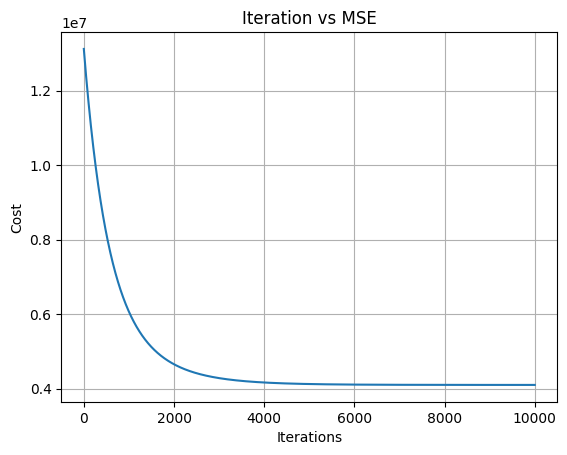

In [14]:
plt.plot(range(len(MSE_hist)), MSE_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Iteration vs MSE")
plt.grid(True)
plt.show()

In [15]:
def r_squared(y_true, y_pred):
    # Flatten inputs to ensure correct computation
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Calculate the total sum of squares (SS_tot) and residual sum of squares (SS_res)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)

    # Compute R-squared
    return 1 - (ss_residual / ss_total)
#performance on testing data
r2 = r_squared(y_test, f_wb(X_test, w, b))
print(f"R-squared: {r2:.4f}")
print(f'R2 score:{r2*100}')


R-squared: 0.7675
R2 score:76.74818770192348


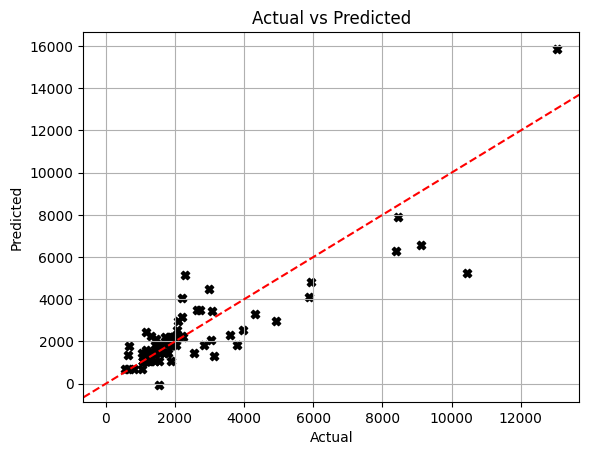

In [16]:
plt.scatter(y_test, f_wb(X_test, w, b), label="MSE over iterations",marker='X',color='black')
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="y = x")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [20]:
actual = y_test.flatten()
predicted = f_wb(X_test, w, b).flatten()

df = pd.DataFrame({
    'actual': actual,
    'predicted': predicted})
df

,actual,predicted
0,1051,702.774691
1,2201,3158.093123
2,3041,2068.239183
3,550,702.774691
4,1156,1066.126641
...,...,...
95,5881,4096.470340
96,1171,1066.126641
97,1171,1066.126641
98,1086,1066.126641
